# Sentiment Scores: Chunks

For system details and resources, see PhD_SystemCheck.ipynb and PhD_Modules.ipynb

In [18]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from langchain.text_splitter import RecursiveCharacterTextSplitter

tokenizer = RegexpTokenizer('\w+')
sentenceTokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Load tokenizer
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

text_splitter = RecursiveCharacterTextSplitter( #Initialize text splitter for chunking process
    chunk_size=1374,
    chunk_overlap=475,
    length_function=len,
    is_separator_regex=False,
)

len(sentimentAnalyzer.lexicon)

7268

In [39]:
#Corpus = PlaintextCorpusReader('test/cleaned', '.*txt') #Define corpus
#len(Corpus.fileids()) #How many files

Corpus = PlaintextCorpusReader('20240604_PhD_Letters/cleaned', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

676

In [40]:
sentiment = pd.DataFrame(columns = ['text',
                                    'docid',
                                    'sequence', 
                                    'totalTokens', 
                                    'uniqueTokens', 
                                    'lexicalDiversity', 
                                    'scoreNeg', 
                                    'scoreNeu', 
                                    'scorePos', 
                                    'scoreCom']) # Create a new dataframe to hold sentences, letter id and compound scores

for fileid in Corpus.fileids(): # For each file in the corpus
    print(fileid) # Show progress
    text = Corpus.raw(fileid) # Place the string into the object "text"
    chunks = text_splitter.split_text(text)
    sequence = 0 # Create a counter to keep track of sentence order
    for chunk in chunks: # For each chunk in this list  
        sequence +=1 # Counter updater    
        #print(sequence) # Show progress
        # Do basic metrics
        tokens = tokenizer.tokenize(chunk)
        totalTokens = len(tokens)
        uniqueTokens = len(set(tokens))
        lexicalDiversity = uniqueTokens/totalTokens
        # Score sentiment
        sentences = sentenceTokenizer.tokenize(chunk) # Place sentences into a list called "sentences"
        scoreNeg = 0.0
        scoreNeu = 0.0
        scorePos = 0.0
        scoreCom = 0.0
        #sequence = 0 # Create a counter to keep track of sentence order
        for sentence in sentences: # For each sentence in the letter 
            #sequence +=1 # Counter updater
            scores = sentimentAnalyzer.polarity_scores(sentence) # Calculate sentiment scores
            scoreNeg += scores["neg"]
            scoreNeu += scores["neu"]
            scorePos += scores["pos"]
            scoreCom += scores["compound"]
        scoreNeg = scoreNeg / len(sentences)
        scoreNeu = scoreNeu / len(sentences)
        scorePos = scorePos / len(sentences)
        scoreCom = scoreCom / len(sentences)
        new_row = pd.Series([chunk, fileid, sequence, totalTokens, uniqueTokens, lexicalDiversity, scoreNeg, scoreNeu, scorePos, scoreCom], index=['text','docid', 'sequence', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom'])
        sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
print("done")

20910.txt
21062.txt
21324.txt
21334.txt
21354.txt
21470.txt
21549.txt
21561.txt
21737.txt
21759.txt
21792.txt
22032.txt
22146.txt
22179.txt
22270.txt
22368.txt
22375.txt
22668.txt
22911.txt
22996.txt
23229.txt
23395.txt
23409.txt
23458.txt
23470.txt
23529.txt
23567.txt
23590.txt
23790.txt
23846.txt
23880.txt
23918.txt
23927.txt
23971.txt
24011.txt
24209.txt
24226.txt
24366.txt
24472.txt
25585.txt
25771.txt
25794.txt
25809.txt
26062.txt
26197.txt
26219.txt
26431.txt
26439.txt
26511.txt
26678.txt
26789.txt
26906.txt
27000.txt
27097.txt
27261.txt
27435.txt
27442.txt
27573.txt
27695.txt
27779.txt
27805.txt
27815.txt
27889.txt
27978.txt
28535.txt
28772.txt
28774.txt
28960.txt
29132.txt
29364.txt
29748.txt
29751.txt
29826.txt
29827.txt
30200.txt
30559.txt
30620.txt
30623.txt
30636.txt
30808.txt
30868.txt
30931.txt
31245.txt
31349.txt
31379.txt
31412.txt
31637.txt
31942.txt
31969.txt
31983.txt
32094.txt
32097.txt
32418.txt
32432.txt
32543.txt
32751.txt
32756.txt
32815.txt
32964.txt
32980.txt


S9865-D036.txt
S9865-D037.txt
S9865-D038.txt
S9865-D039.txt
S9865-D040.txt
S9865-D045.txt
S9865-D046.txt
S9865-D047.txt
S9865-D054.txt
S9865-D055.txt
S9865-D056.txt
S9865-D057.txt
S9865-D058.txt
S9865-D059.txt
S9865-D060.txt
S9865-D061.txt
S9873-D013.txt
S9873-D014.txt
S9873-D015.txt
S9873-D017.txt
S9873-D018.txt
S9873-D019.txt
S9873-D020.txt
S9873-D021.txt
S9913-D003.txt
S9913-D004.txt
S9913-D006.txt
S9913-D015.txt
S9913-D016.txt
S9957-D012.txt
S9957-D013.txt
S9957-D014.txt
S9957-D015.txt
S9974-D008.txt
S9974-D010.txt
done


In [69]:
# What is the overall shape of the dataframe
sentiment.shape

(2392, 12)

In [42]:
#re-jig data types
cols = ['lexicalDiversity', 'scoreNeg', 'scoreNeu', 'scorePos', 'scoreCom']
sentiment[cols] = sentiment[cols].apply(pd.to_numeric, errors='coerce', axis=1)

sentiment['totalTokens'] = sentiment['totalTokens'].astype(int)
sentiment['uniqueTokens'] = sentiment['uniqueTokens'].astype(int)
sentiment['sequence'] = sentiment['sequence'].astype(int)

sentiment.dtypes

text                 object
docid                object
sequence              int64
totalTokens           int64
uniqueTokens          int64
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
dtype: object

In [43]:
sentiment.describe()

,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,3.527592,243.530936,148.505435,0.618855,0.048813,0.849761,0.100862,0.142533
std,3.079063,49.658734,25.153115,0.059093,0.036785,0.061064,0.051817,0.290587
min,1.000000,86.000000,63.000000,0.400000,0.000000,0.591286,0.000000,-0.990700
25%,1.000000,239.000000,144.000000,0.580615,0.021661,0.810771,0.063198,0.010102
50%,3.000000,263.000000,157.000000,0.616541,0.041308,0.854258,0.092735,0.120209
75%,5.000000,274.000000,165.000000,0.651665,0.066872,0.894080,0.130000,0.246810
max,29.000000,310.000000,185.000000,0.863636,0.299500,0.988273,0.368286,0.995500


<Axes: >

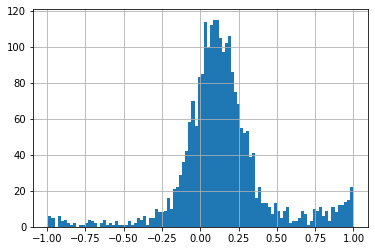

In [44]:
sentiment['scoreCom'].hist(bins=100)

In [47]:
sentiment.loc[sentiment['scoreCom'] > .75]

,text,docid,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
3,May 25 1892 Dear Sister I write once to Bid yo...,21324.txt,1,210,139,0.661905,0.046,0.799,0.1550,0.94230
31,Octr October 29 1888 My dear Uncle George I wo...,21792.txt,1,273,162,0.593407,0.048,0.775,0.1770,0.90635
32,Mr Waller who may have some however I do not k...,21792.txt,2,256,153,0.597656,0.010,0.840,0.1500,0.86265
33,so well and graphically told so true to life -...,21792.txt,3,261,152,0.582375,0.005,0.879,0.1160,0.95510
34,it is all on my own shoulders I feel the want ...,21792.txt,4,257,157,0.610895,0.039,0.876,0.0840,0.83280
...,...,...,...,...,...,...,...,...,...,...
1865,newes that was needed with out me troubling yo...,S9635-D016.txt,10,253,133,0.525692,0.014,0.914,0.0720,0.76080
1883,October 23rd 1848 Dear Brother I take this opp...,S9635-D023.txt,1,278,145,0.521583,0.035,0.798,0.1665,0.88115
1887,let me know how Edward Stuart and family is an...,S9635-D023.txt,5,290,159,0.548276,0.014,0.901,0.0860,0.93270
1888,wheat is from 2s 6d to 3s sterling pr Bushel o...,S9635-D023.txt,6,215,122,0.567442,0.000,0.913,0.0870,0.94130


In [50]:
sentiment.iloc[33,0] 

'so well and graphically told so true to life - - but shall I mention the name of each correspondent she addresses such a as Miss Beaufort - Mrs Waller Miss Wilson - Mrs Kirkpatrick - I wish to know this particularly - I am doing all this for my Mother\'s children Grandchildren and Great G-Grandchildren - it will be of great interest - I have a friend who is willing to help me Mr Houstain son of our friend G Houstain our great friend - Arnold H- has given me the his enquiries and finds I am get it published in Toronto at a very easy price - within our of publishing - should I get 60 subscribers it would cost cash about $1-25 - Arnold Houstain read the first part I have ready and wishes much I should give it to the public - this I have not thought about - there is nothing personal in any part - only our own selves and even that I have only named each by the Initial - A - B - and E &c &c - it is all on my own shoulders I feel the want of advise - he also said to add much by appendix as m

In [51]:
sumVal = sentiment['scoreNeg'] + sentiment['scoreNeu'] + sentiment['scorePos']
sumVal.describe()

count    2392.000000
mean        0.999437
std         0.007146
min         0.833000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.001000
dtype: float64

<Axes: >

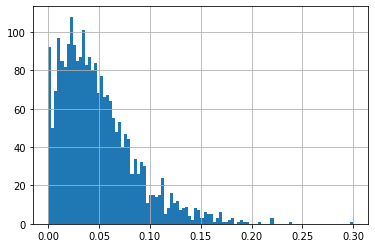

In [52]:
sentiment['scoreNeg'].hist(bins=100)

<Axes: >

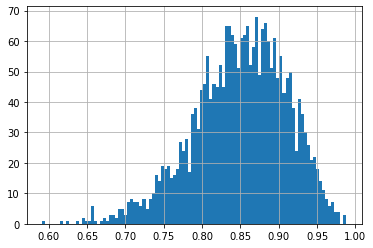

In [53]:
sentiment['scoreNeu'].hist(bins=100)

<Axes: >

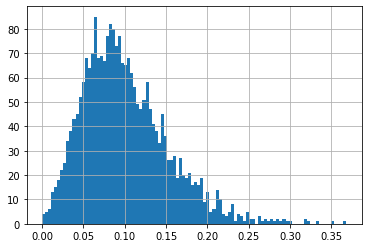

In [54]:
sentiment['scorePos'].hist(bins=100)

<Axes: >

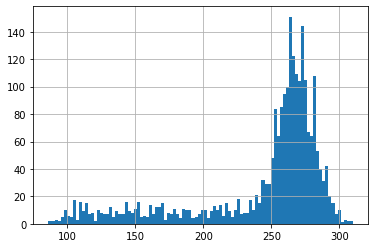

In [55]:
sentiment['totalTokens'].hist(bins=100)

<Axes: >

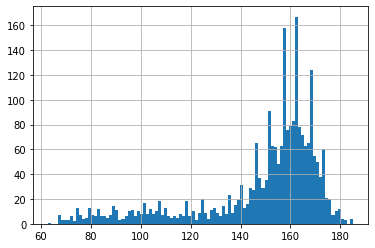

In [56]:
sentiment['uniqueTokens'].hist(bins=100)

<Axes: >

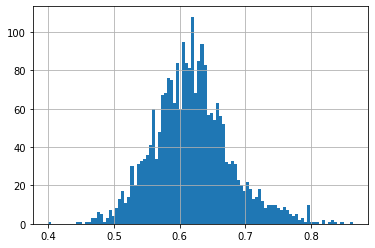

In [57]:
sentiment['lexicalDiversity'].hist(bins=100)

In [58]:
# Remove the .txt from the file name
sentiment['docid'] = sentiment['docid'].str.replace(r'.txt', '', regex=True)
sentiment.head()

,text,docid,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom
0,July 18 1891 Dear Sister I have waited until I...,20910,1,182,119,0.653846,0.00000,0.855000,0.145000,0.515100
1,Nov 17th My dearest Kate I got this interestin...,21062,1,269,163,0.605948,0.04100,0.748667,0.210500,0.279733
2,better account since he went. The poor parents...,21062,2,122,97,0.795082,0.04075,0.667000,0.292250,0.081575
3,May 25 1892 Dear Sister I write once to Bid yo...,21324,1,210,139,0.661905,0.04600,0.799000,0.155000,0.942300
4,1891 Oct. 12th Miss Weir Dear friend I now ans...,21334,1,287,174,0.606272,0.04500,0.819222,0.135778,0.146967


In [59]:
# Add a column "chunks" showing total number of chunks extracted from each letter
sentiment['chunks'] = sentiment.groupby('docid')['sequence'].transform('max')
sentiment.head()

,text,docid,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom,chunks
0,July 18 1891 Dear Sister I have waited until I...,20910,1,182,119,0.653846,0.00000,0.855000,0.145000,0.515100,1
1,Nov 17th My dearest Kate I got this interestin...,21062,1,269,163,0.605948,0.04100,0.748667,0.210500,0.279733,2
2,better account since he went. The poor parents...,21062,2,122,97,0.795082,0.04075,0.667000,0.292250,0.081575,2
3,May 25 1892 Dear Sister I write once to Bid yo...,21324,1,210,139,0.661905,0.04600,0.799000,0.155000,0.942300,1
4,1891 Oct. 12th Miss Weir Dear friend I now ans...,21334,1,287,174,0.606272,0.04500,0.819222,0.135778,0.146967,2


In [60]:
# Add a column "Position" showing the location of the chunk relative to the whole 
# That is, how far through the letter does the chunk appear?
sentiment['position'] = sentiment['sequence'] / sentiment['chunks']
sentiment.head()

,text,docid,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom,chunks,position
0,July 18 1891 Dear Sister I have waited until I...,20910,1,182,119,0.653846,0.00000,0.855000,0.145000,0.515100,1,1.0
1,Nov 17th My dearest Kate I got this interestin...,21062,1,269,163,0.605948,0.04100,0.748667,0.210500,0.279733,2,0.5
2,better account since he went. The poor parents...,21062,2,122,97,0.795082,0.04075,0.667000,0.292250,0.081575,2,1.0
3,May 25 1892 Dear Sister I write once to Bid yo...,21324,1,210,139,0.661905,0.04600,0.799000,0.155000,0.942300,1,1.0
4,1891 Oct. 12th Miss Weir Dear friend I now ans...,21334,1,287,174,0.606272,0.04500,0.819222,0.135778,0.146967,2,0.5


## Summary Stats

In [61]:
sentiment.dtypes

text                 object
docid                object
sequence              int64
totalTokens           int64
uniqueTokens          int64
lexicalDiversity    float64
scoreNeg            float64
scoreNeu            float64
scorePos            float64
scoreCom            float64
chunks                int64
position            float64
dtype: object

In [25]:
#sentiment[['sequence', 'scoreNeg', 'scorePos', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'position']] = sentiment[['sequence', 'scoreNeg', 'scorePos', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'position']].astype(str).astype(float)

In [63]:
sentiment.describe()

,sequence,totalTokens,uniqueTokens,lexicalDiversity,scoreNeg,scoreNeu,scorePos,scoreCom,chunks,position
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,3.527592,243.530936,148.505435,0.618855,0.048813,0.849761,0.100862,0.142533,6.055184,0.641304
std,3.079063,49.658734,25.153115,0.059093,0.036785,0.061064,0.051817,0.290587,4.418352,0.294351
min,1.000000,86.000000,63.000000,0.400000,0.000000,0.591286,0.000000,-0.990700,1.000000,0.034483
25%,1.000000,239.000000,144.000000,0.580615,0.021661,0.810771,0.063198,0.010102,3.000000,0.400000
50%,3.000000,263.000000,157.000000,0.616541,0.041308,0.854258,0.092735,0.120209,5.000000,0.666667
75%,5.000000,274.000000,165.000000,0.651665,0.066872,0.894080,0.130000,0.246810,8.000000,1.000000
max,29.000000,310.000000,185.000000,0.863636,0.299500,0.988273,0.368286,0.995500,29.000000,1.000000


<Axes: >

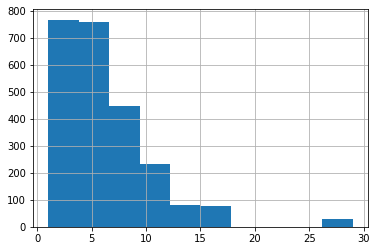

In [66]:
sentiment['chunks'].hist()

In [68]:
sentiment.to_csv('20240607_PhD_SentimentLetters-Chunks.csv', index = True, encoding="utf-8")